# Grand spectral analyses

In [1]:
from sleepeegpy.pipeline import SpectralPipe, GrandSpectralPipe

In [2]:
subjects = ['EL3001', 'EL3003', 'EL3005']
pipes = [
    SpectralPipe(
        # can be any type of eeg file that MNE's read_raw() function supports.
        path_to_eeg=f"C:/Users/Gennadiy/Documents/data/{subject}/after_ica_raw.fif",
        # A directory you want the results to be saved in.
        output_dir=f"C:/Users/Gennadiy/Documents/data/{subject}",
        # Point-per-row type of hypnogram
        path_to_hypno=f"C:/Users/Gennadiy/Documents/data/{subject}/staging.txt",  
        hypno_freq=1,  # Hypnogram's sampling frequency (visbrain's hypnograms default to 1)
    ) for subject in subjects
]

Opening raw data file C:\Users\Gennadiy\Documents\data\EL3001\after_ica_raw.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 0 ... 1994499 =      0.000 ...  7977.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\EL3001\after_ica_raw-1.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 1994500 ... 3988999 =   7978.000 ... 15955.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\EL3001\after_ica_raw-2.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 3989000 ... 5983499 =  15956.000 ... 23933.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\EL3001\after_ica_raw-3.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 5983500 ... 5985607 =  23934.000 ... 23942.428 secs
Ready.


Hypnogram is SHORTER than data by 0.43 seconds. Padding hypnogram with last value to match data.size.


Opening raw data file C:\Users\Gennadiy\Documents\data\EL3003\after_ica_raw.fif...
    Range : 0 ... 1994499 =      0.000 ...  7977.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\EL3003\after_ica_raw-1.fif...
    Range : 1994500 ... 3988999 =   7978.000 ... 15955.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\EL3003\after_ica_raw-2.fif...
    Range : 3989000 ... 5983499 =  15956.000 ... 23933.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\EL3003\after_ica_raw-3.fif...
    Range : 5983500 ... 6961683 =  23934.000 ... 27846.732 secs
Ready.


Hypnogram is SHORTER than data by 0.74 seconds. Padding hypnogram with last value to match data.size.


Opening raw data file C:\Users\Gennadiy\Documents\data\EL3005\after_ica_raw.fif...
    Range : 0 ... 2039999 =      0.000 ...  8159.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\EL3005\after_ica_raw-1.fif...
    Range : 2040000 ... 4079999 =   8160.000 ... 16319.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\EL3005\after_ica_raw-2.fif...
    Range : 4080000 ... 5785273 =  16320.000 ... 23141.092 secs
Ready.


Hypnogram is SHORTER than data by 0.1 seconds. Padding hypnogram with last value to match data.size.


In [3]:
grand_pipe = GrandSpectralPipe(
    pipes=pipes, output_dir="C:/Users/Gennadiy/Documents/data/grand"
)

In [4]:
grand_pipe.compute_psd(
    # A dict describing stages and their indices in the hypnogram file.
    sleep_stages={"Wake": 0, "N1": 1, "N2": 2, "N3": 3, "REM": 4},
    # Rereferencing to apply. Can be list of str channels or "average".
    # If None, will not change the reference.
    reference="average",
    fmin=0,  # Lower frequency bound.
    fmax=60,  # Upper frequency bound.
    picks="eeg",  # Channels to compute the PSD for.
    reject_by_annotation=True,  # Whether to reject epochs annotated as BAD.
    save=True,  # Whether to save the average PSD hdf5 file for each sleep stage.
    overwrite=True,  # Whether to overwrite hdf5 files if there are any.
    # Additional arguments passed to MNE's psd_array_welch:
    n_fft=2048,
    n_per_seg=1024,
    n_overlap=512,
    window="hamming",
    n_jobs=-1,
    verbose=False
)

Reading 0 ... 5985607  =      0.000 ... 23942.428 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Removing existing average EEG reference projection.
Setting 289559 of 5985608 (4.84%) samples to NaN, retaining 5696049 (95.16%) samples.
Reading 0 ... 6961683  =      0.000 ... 27846.732 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting 483728 of 6961684 (6.95%) samples to NaN, retaining 6477956 (93.05%) samples.
Reading 0 ... 5785273  =      0.000 ... 23141.092 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting 295083 of 5785274 (5.10%) samples to NaN, retaining 5490191 (94.90%) samples.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.


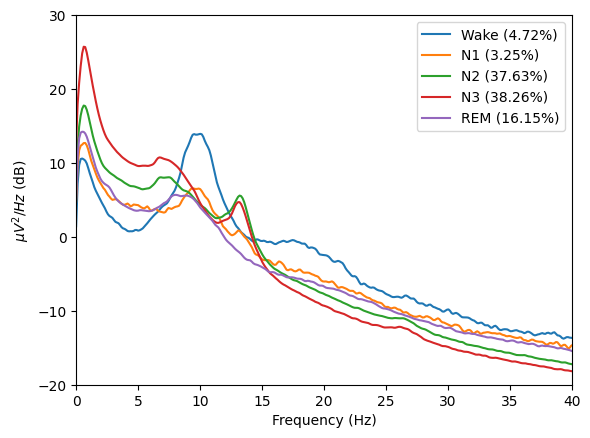

In [5]:
grand_pipe.plot_psds(
    picks=["E101"],
    psd_range=(-20, 30),  # Y axis limits
    freq_range=(0, 40),  # X axis limits
    dB=True,
    xscale="linear",  # Matplotlib xscale. Can be {"linear", "log", "symlog", "logit", ...} or ScaleBase
    axis=None,
    save=True,  # Whether to save the plot as a png file.
)

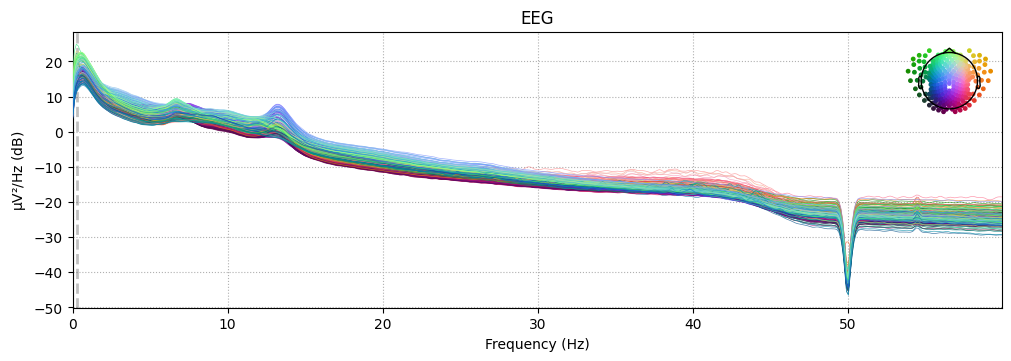

In [6]:
_ = grand_pipe.psds["N2"].plot(picks="data", exclude="bads", show=False)

You can access  the grand average PSD through grand_pipe and the per-subject psds through corresponding pipe objects.

In [7]:
grand_pipe.psds["REM"].get_data(), pipes[0].psds["REM"].get_data()

(array([[4.19018951e-11, 1.91439310e-10, 3.15607608e-10, ...,
         7.29004202e-15, 7.01101295e-15, 6.99948348e-15],
        [3.21142011e-11, 1.45298876e-10, 2.41224532e-10, ...,
         3.50307783e-15, 3.43583349e-15, 3.41955302e-15],
        [1.69450658e-11, 7.47489230e-11, 1.24996995e-10, ...,
         4.06656085e-15, 3.98604701e-15, 3.84453986e-15],
        ...,
        [7.70641073e-12, 3.08046271e-11, 5.01781103e-11, ...,
         5.17841426e-15, 5.22048068e-15, 5.36141795e-15],
        [3.49606698e-12, 1.37125151e-11, 2.27727129e-11, ...,
         3.53776577e-15, 3.56650048e-15, 3.70910281e-15],
        [3.94406383e-12, 1.52977802e-11, 2.57909123e-11, ...,
         1.05993990e-14, 1.03174952e-14, 1.02331459e-14]]),
 array([[1.22825923e-10, 5.64282553e-10, 9.27330330e-10, ...,
         2.18596172e-14, 2.10231310e-14, 2.09880110e-14],
        [9.33710790e-11, 4.25464163e-10, 7.03254730e-10, ...,
         1.04966507e-14, 1.02957499e-14, 1.02461873e-14],
        [4.75357321e-11, 

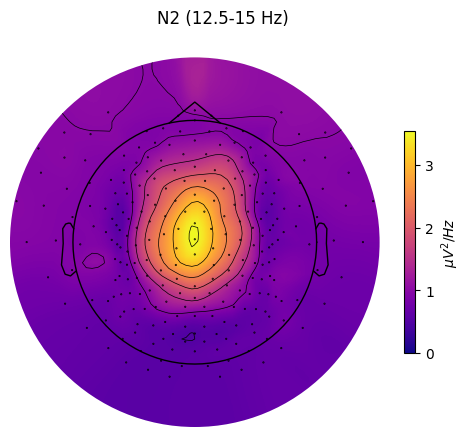

In [8]:
grand_pipe.plot_topomap(
    stage="N2",  # Stage to plot topomap for.
    band={"SMR": (12.5, 15)},  # Band to plot topomap for.
    # Should contain at least index of the provided "stage".
    dB=False,  # Whether to transform PSD to dB/Hz
    axis=None,  # Whether to plot on provided matplotlib axis.
    save=True,  # Whether to save the plot as a file.
    topomap_args=dict(cmap="plasma"),  # Arguments passed to mne.viz.plot_topomap().
    cbar_args=None,  # Arguments passed to plt.colorbar().
)

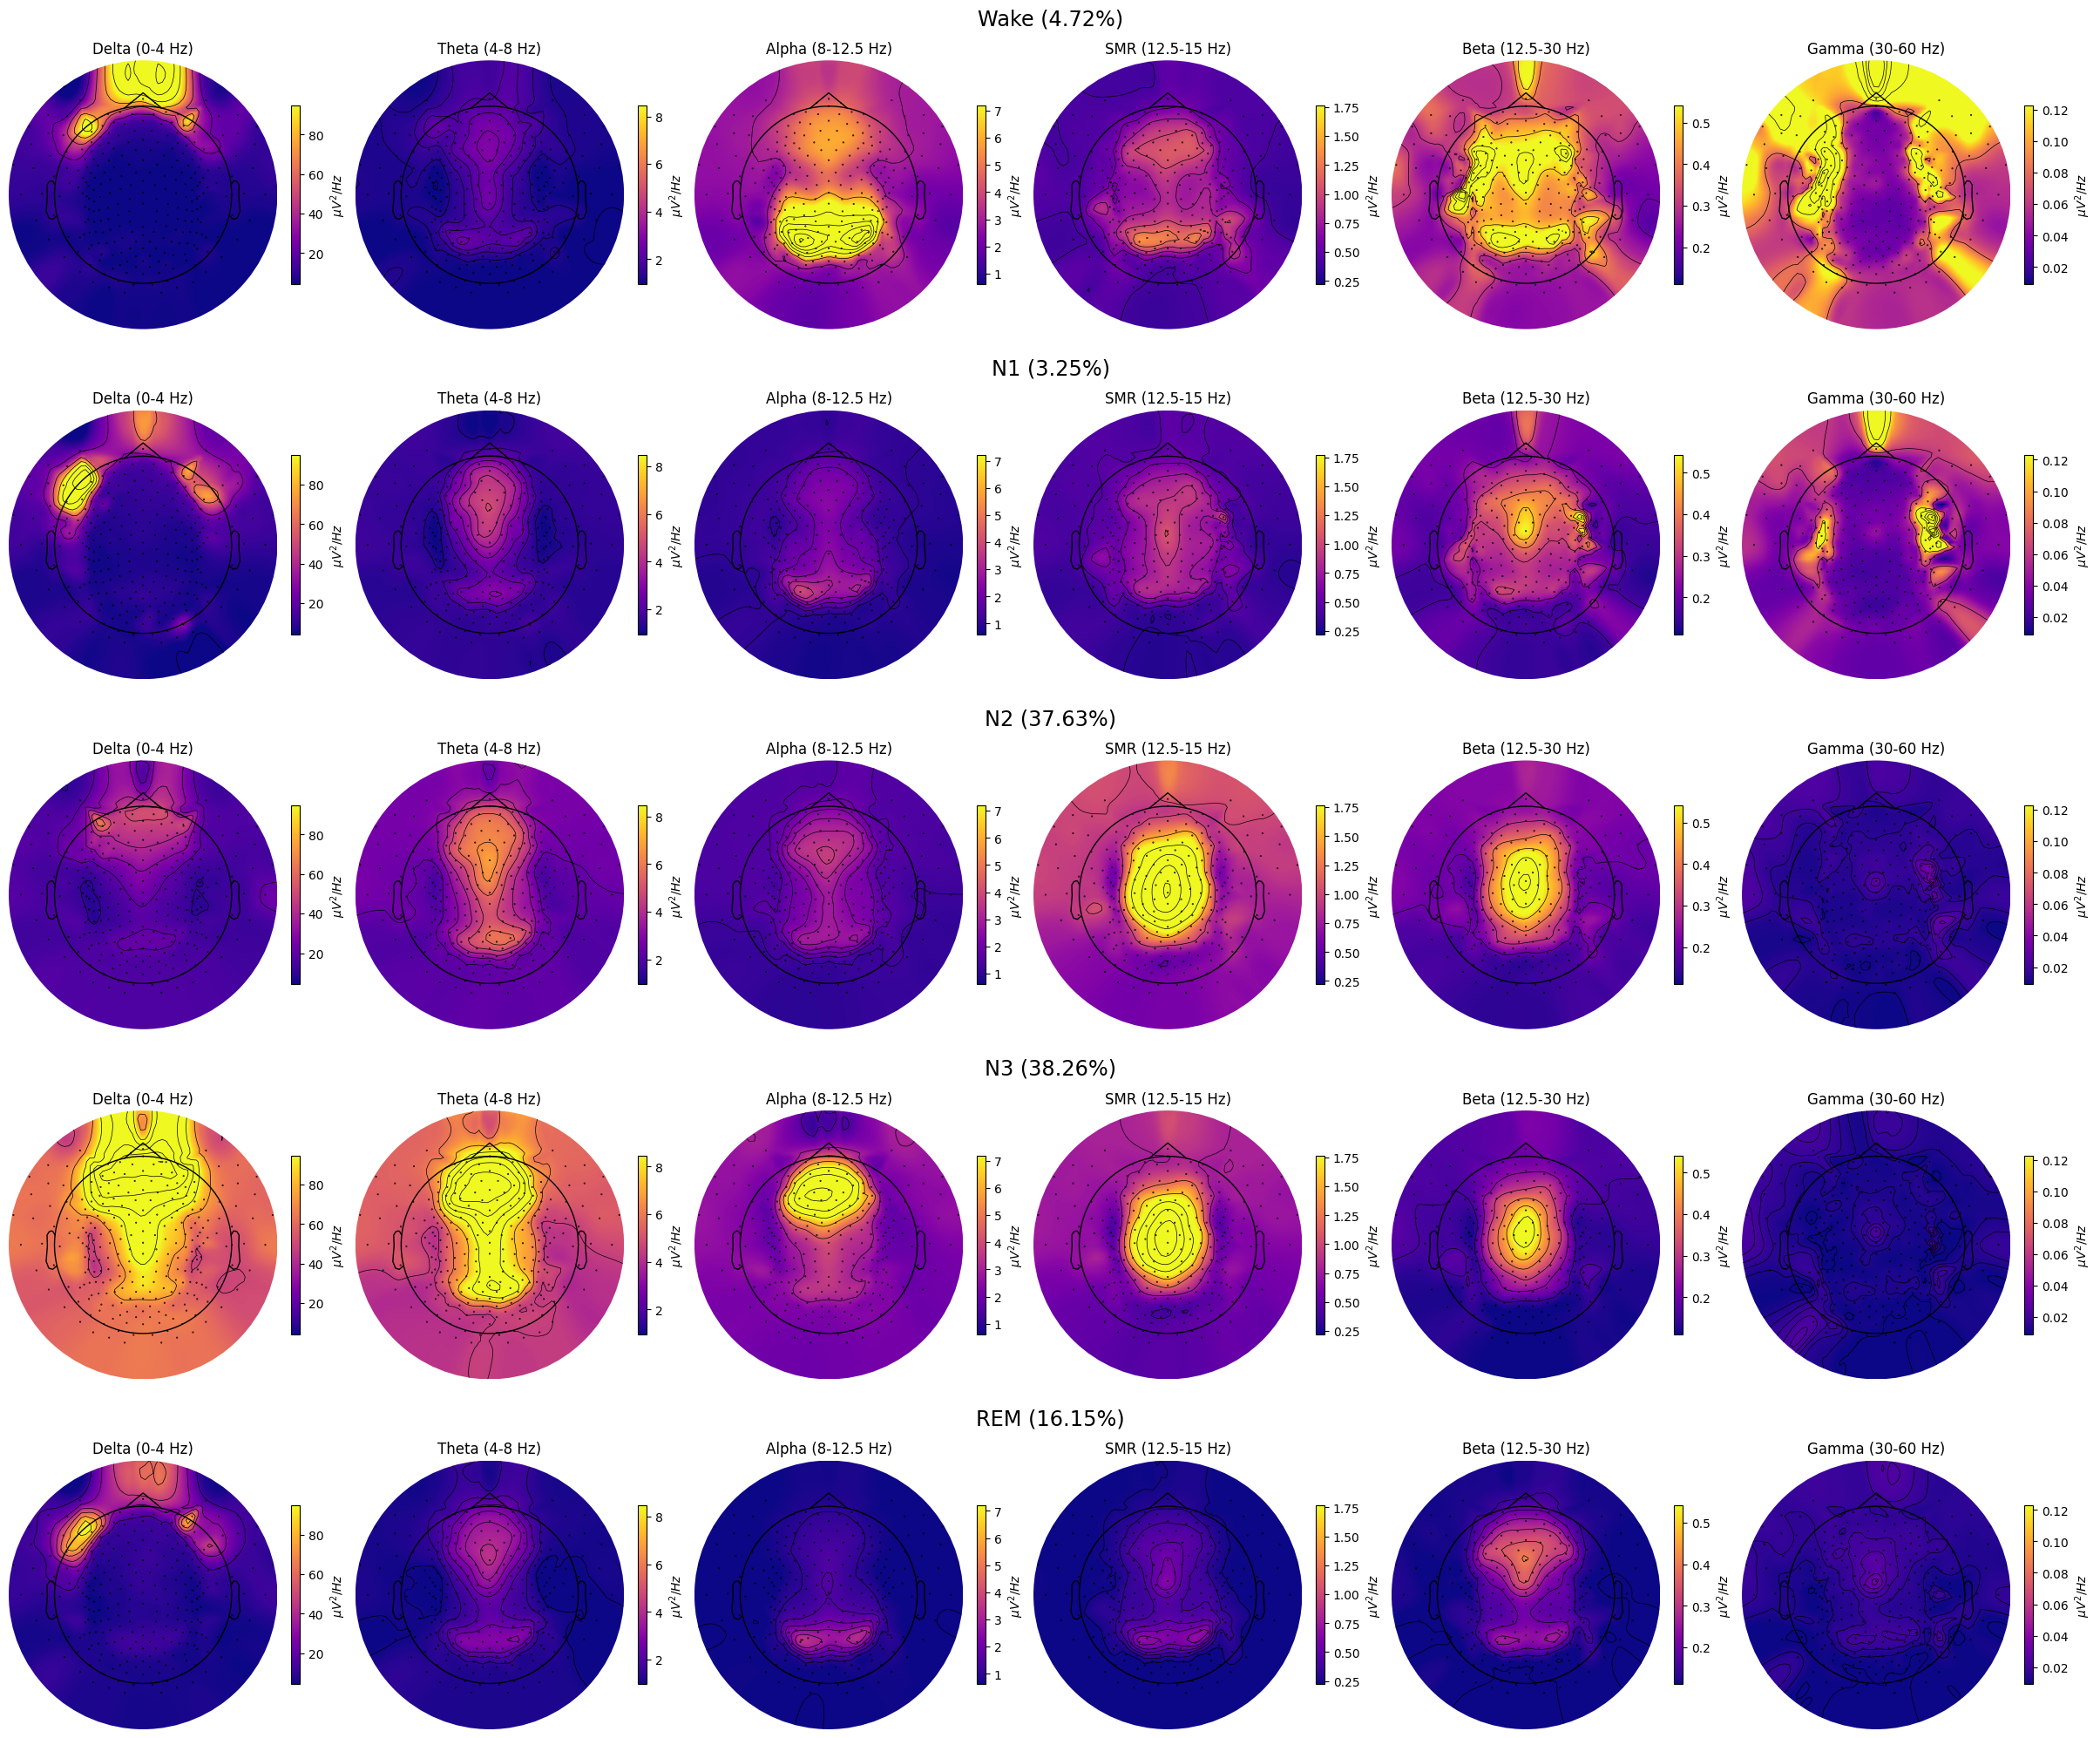

In [9]:
grand_pipe.plot_topomap_collage(
    #  Bands to plot topomaps for.
    bands={
        "Delta": (0, 4),
        "Theta": (4, 8),
        "Alpha": (8, 12.5),
        "SMR": (12.5, 15),
        "Beta": (12.5, 30),
        "Gamma": (30, 60),
    },
    # Tuple of strs or "all", e.g., ("N1", "REM") or "all" (plots all "sleep_stages").
    stages_to_plot="all",
    dB=False,  # Whether to transform PSD to dB/Hz.
    low_percentile=5,  # Set min color value by percentile of the band data.
    high_percentile=95,  # Set max color value by percentile of the band data.
    fig=None,  # Instance of plt.Figure, a new fig will be created if None.
    save=True,  # Whether to save the plot as a file.
    topomap_args=dict(cmap="plasma"),  # Arguments passed to mne.viz.plot_topomap().
    cbar_args=None,  # Arguments passed to plt.colorbar().
)

In [10]:
grand_pipe.parametrize(
    picks=['E101'],  # Channels to use, if multiple channels are provided, their PSDs will be averaged.
    freq_range=[0.5, 40],  # Range of frequencies to parametrize.
    # Whether to average psds over channels.
    # If False and more than one channel is provided,
    # will be averaged over subjects.
    average_ch=False,
)

Running FOOOFGroup across 3 power spectra.
Running FOOOFGroup across 3 power spectra.
Running FOOOFGroup across 3 power spectra.
Running FOOOFGroup across 3 power spectra.
Running FOOOFGroup across 3 power spectra.


Running FOOOFGroup across 3 power spectra.
                                                                                                  
                                       FOOOF - GROUP RESULTS                                      
                                                                                                  
                             Number of power spectra in the Group: 3                              
                                                                                                  
                        The model was run on the frequency range 0 - 40 Hz                        
                                 Frequency Resolution is 0.12 Hz                                  
                                                                                                  
                              Power spectra were fit without a knee.                              
                                                                  

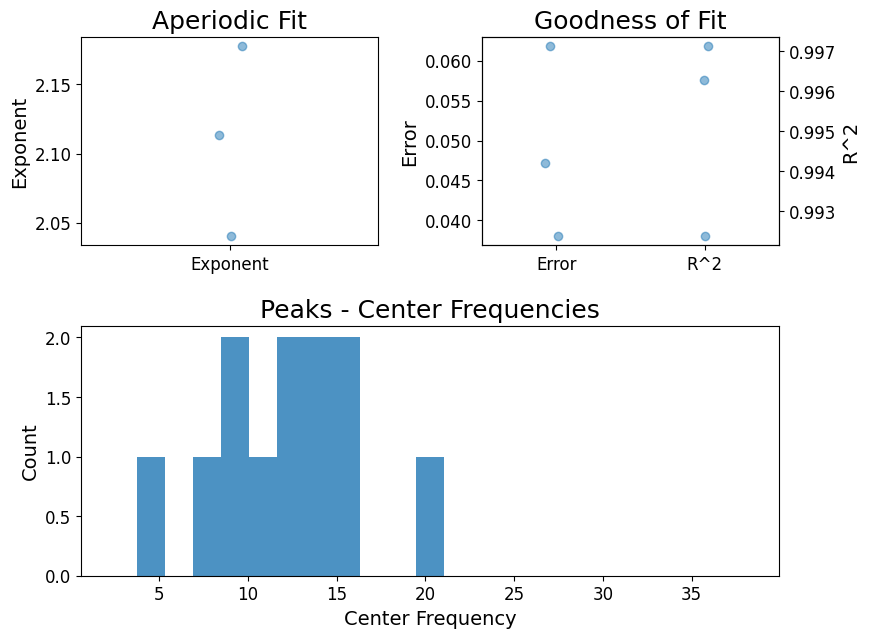

In [11]:
grand_pipe.fooofs['N2'].report()

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 0 - 40 Hz                        
                                 Frequency Resolution is 0.12 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -10.1661, 2.1774                                         
                                                                                                  
                                       4 peaks were found:                                        
          

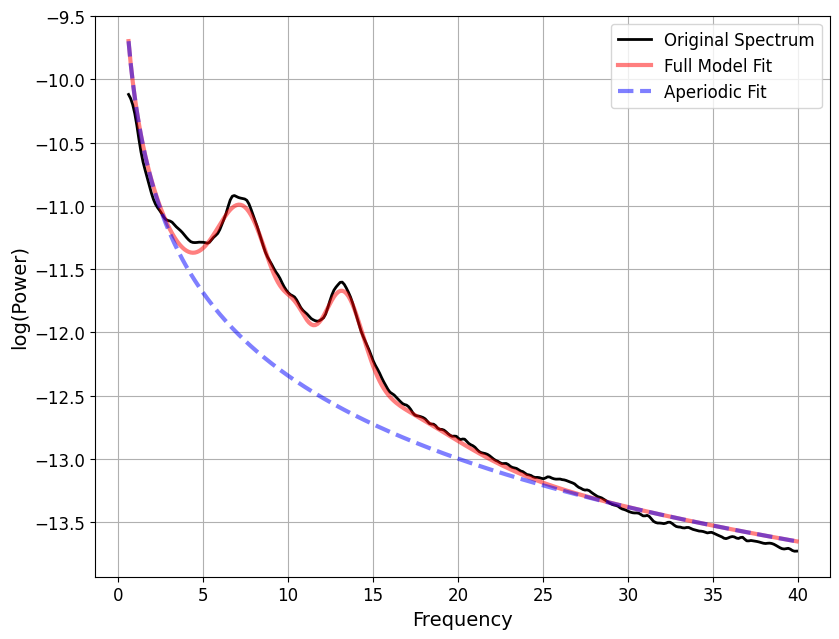

In [12]:
grand_pipe.fooofs['N2'].get_fooof(ind=0).report()

In [13]:
from fooof.analysis import get_band_peak_fg
smr_peaks = get_band_peak_fg(grand_pipe.fooofs['N2'], band=[12.5, 15])
smr_peaks

array([[13.23758589,  0.93305307,  2.30304344],
       [12.52734355,  0.94395269,  5.75804993],
       [13.43673981,  1.36222484,  1.45597284]])